# 2.1 - Más modelos USL

In [1]:
import pylab as plt

from sklearn.datasets import make_moons

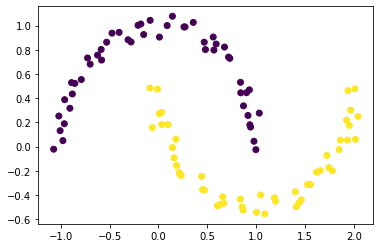

In [6]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)

plt.scatter(moons[0][:, 0], moons[0][:, 1], c=moons[1]);

# DBSCAN 

**Density Based Spatial Clustering of Applications with Noise**

![dbscan](images/dbscan.png)


DBSCAN requiere de dos parámetros:

+ $\epsilon$ : distancia de la vecindad
+ Número mínimo de puntos para considerarla vecindad

Se comienza con un punto arbitrario que no haya sido visitado. La $\epsilon$-vecindad de éste punto se evalúa, para determinar su densidad y si tiene suficientes puntos se clusteriza, si no, se considera que el punto es ruido.


**Ventajas**
+ No necesita saber el nº de clusters
+ Se reduce el single-link (un cluster dentro de otro)
+ Tiene noción del ruido (detecta muy bien outliers)
+ Solo dos parámetros


**Desventajas**
+ No es determinista en los límites del cluster
+ Depende de la distancia
+ No puede manejar grandes diferencias de densidad


In [7]:
from sklearn.cluster import DBSCAN

In [9]:
dbscan=DBSCAN()

In [11]:
#help(dbscan)

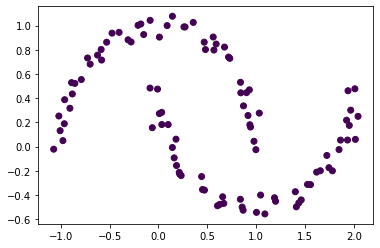

In [12]:
dbscan.fit(moons[0])

plt.scatter(moons[0][:, 0], moons[0][:, 1], c=dbscan.labels_);

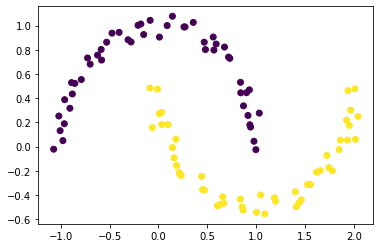

In [29]:
dbscan=DBSCAN(eps=0.25)

dbscan.fit(moons[0])

plt.scatter(moons[0][:, 0], moons[0][:, 1], c=dbscan.labels_);

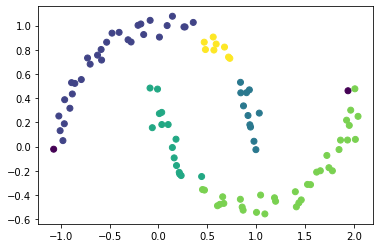

In [28]:
dbscan=DBSCAN(eps=0.235, min_samples=7)

dbscan.fit(moons[0])

plt.scatter(moons[0][:, 0], moons[0][:, 1], c=dbscan.labels_);

# HDBSCAN

**Hierarchical DBSCAN**

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

Extiende DBSCAN haciéndolo jerárquico. El algoritmo se basa en:

1) Transformar el espacio según densidad

2) Grafo de árboles de distancias

3) Cluster jerárquicos

4) Condensar los clusters basándose en el tamaño

5) Extraer clusters estables desde el árbol

In [31]:
#!pip install hdbscan

In [32]:
from hdbscan import HDBSCAN

In [34]:
hdbscan=HDBSCAN(gen_min_span_tree=True)

#help(hdbscan)

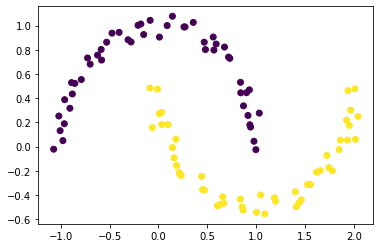

In [35]:
hdbscan.fit(moons[0])

plt.scatter(moons[0][:, 0], moons[0][:, 1], c=hdbscan.labels_);

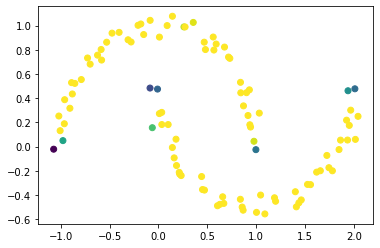

In [36]:
plt.scatter(moons[0][:, 0], moons[0][:, 1], c=hdbscan.probabilities_);

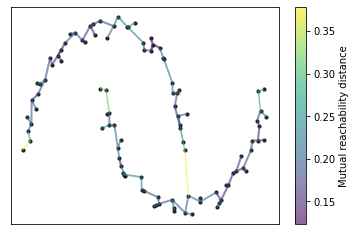

In [39]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                    edge_alpha=0.6, 
                                    node_size=10, 
                                    edge_linewidth=1.2);

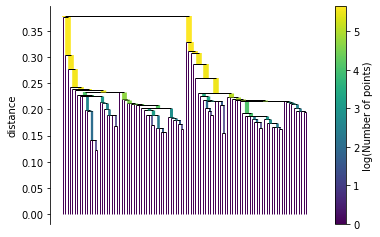

In [41]:
hdbscan.single_linkage_tree_.plot(cmap='viridis',
                                  colorbar=True);

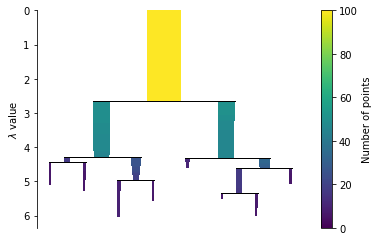

In [42]:
hdbscan.condensed_tree_.plot();

In [43]:
import seaborn as sns

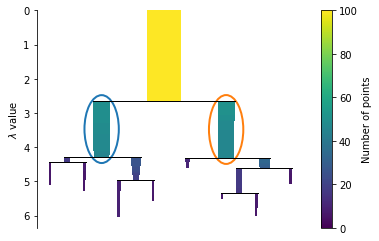

In [44]:
hdbscan.condensed_tree_.plot(select_clusters=True,
                             selection_palette=sns.color_palette());

# OPTICS

**Ordering Points To Identify the Clustering Structure**

Generalización del DBSCAN, busca el núcleo de la muestra con la más alta densidad y expande los clusteres desde ahí.

![optics](images/optics.png)

In [45]:
from sklearn.cluster import OPTICS

In [47]:
opt=OPTICS(eps=0.5, max_eps=2)

#help(opt)

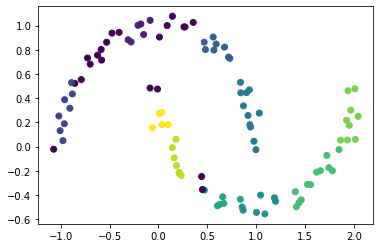

In [48]:
opt.fit(moons[0])

plt.scatter(moons[0][:, 0], moons[0][:, 1], c=opt.labels_);

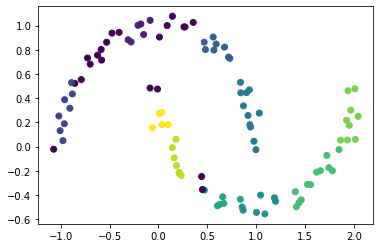

In [53]:
opt=OPTICS(eps=0.35, max_eps=0.5)

opt.fit(moons[0])

plt.scatter(moons[0][:, 0], moons[0][:, 1], c=opt.labels_);

# GMM

**Gaussian Mixture Models**

Se asume que los datos son mezclas de un nº finito de distribuciones gaussianas de parámetros desconocidos (N($\mu$,$\sigma$))


![gmm](images/gmm.png)


![gmm2](images/gmm2.png)

![](data/usl_models.png)

![usl_models](images/usl_models.png)